<a href="https://colab.research.google.com/github/mahoneynomadic/mathematical_aspects_of_machine_learning/blob/main/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mathematical aspects of Machine Learning: exercise sheet 1 

Lecturers: Péter Koltai, Mattes Mollenhauer

In [1]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.random import multivariate_normal

In [2]:
def mc_upper_half(n_points, n_trials):
    """
    Samples the probability that for
    n_points (int) independent copies of 
    the twodimensional random varable X ~ N( 0, Id)
    we have X[1] >= 0 in every realization.
    
    The simulation is run n_trials (int) times.
    """
    trial_vec = []
    for i in range(n_trials): # monte carlo iteration
        x = multivariate_normal([0, 0], np.eye(2), n_points) # sampling
        x_pos = (x[:,1] >= 0) # check second coordinate pointwise
        trial_vec.append(np.all(x_pos)) 
    return sum(trial_vec) / n_trials

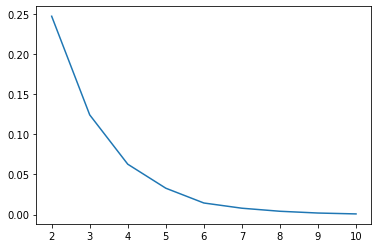

In [3]:
vec = []
for n_points in range(2,11):
    vec.append(mc_upper_half(n_points, 10000))
    
plt.plot(range(2,11), vec)

### Idea of the "common half plane" algorithm:

Given a set of points $x_1, \cdots, x_n$, perform the following:

For all possible tuples $(x_i,x_j,x_k)$ for
$1 \leq i,j,k \leq n$: check whether the polar angle of $x_i$ is in
between the area enclosed by the "flipped" ($+\pi$) polar angles of $x_j$ and
$x_k$.

If there is such a tuple where this occurs, the dataset is **not** contained in a common half plane.

In [4]:
def common_halfplane(points):
    """
    Tests whether an array of 2d points is fully contained
    in an arbitrary half plane.
    
    Inputs
        points (ndarray): An array of shape [n, 2], where n denotes the
        number of points
    """
    angles = np.array([np.arctan2(p[1], p[0]) for p in points]) # angles of all points in [-pi,pi]
    
    def _is_between(alpha, angles):
        """
        Checks whether an angle alpha with range [0, 2pi]
        is in the smaller part
        of a circle between two angles = [angle1, angle2] 
        """
        lo, hi = min(angles), max(angles)
        if hi - lo > np.pi:
            return (alpha < lo) or (alpha > hi)
        else: 
            return (alpha < hi) and (alpha > lo)
        
    vec = []
    for alpha, beta1, beta2 in itertools.permutations(angles, 3): # go through all combinations of angles
        beta1, beta2 = beta1+ np.pi, beta2 + np.pi # flip two enclosing angles: they are now in [0, 2pi]
        alpha = (alpha + 2 * np.pi) % (2 * np.pi) # transform remaining angle to [0, 2pi]
        vec.append(_is_between(alpha, [beta1, beta2])) # check whether alpha is between beta1, beta2
    return not any(vec)

In [5]:
def mc_arbitrary_half(n_points, n_trials):
    """
    Samples the probability that
    n_points (int) independent copies of 
    the twodimensional random varable X ~ N( 0, Id)
    are contained in an arbitrary half plane.
    
    The simulation is run n_trials (int) times.
    """
    trial_vec = []
    for i in range(n_trials): # monte carlo iteration
        points = multivariate_normal([0, 0], np.eye(2), n_points) # sampling
        trial_vec.append(common_halfplane(points)) # run our common_plane algorithm
    return sum(trial_vec) / n_trials

In [6]:
mc_arbitrary_half(3, 10000)

0.7495

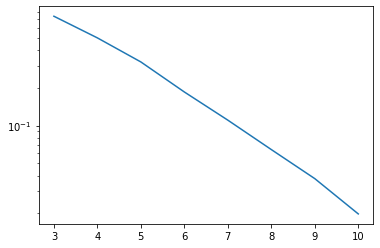

In [7]:
vec = []
for n_points in range(3,11):
    vec.append(mc_arbitrary_half(n_points, 5000))
    
plt.semilogy(range(3,11), vec)